# Car model

Import the library

In [14]:
from carculator import *

Load the default car parameters

In [15]:
cip = CarInputParameters()

Define the calculation mode: static or stochastic(number of iterations)
* `static`: the model use one value for each parameter: the most likely value
* `stochastic`: the model uses a range of values pseudo-randomly generated on the basis of a probability distribution. The number of values generated is given by the integer argument passed to `.stochastic()`

In [16]:
cip.static()

Fill-in the array that will be used to create the car models

In [17]:
dcts, array = fill_xarray_from_input_parameters(cip)

We can check the powertrains, sizes and yers considered

In [18]:
list(array.powertrain.values)

['BEV',
 'FCEV',
 'HEV-p',
 'ICEV-d',
 'ICEV-g',
 'ICEV-p',
 'PHEV',
 'PHEV-c',
 'PHEV-e']

In [19]:
list(array.year.values)

[2017, 2040]

It is possible to derive car models for other years by interpolating between 2017 and 2040 (or extrapolating beyond 2040 or before 2017).

In [20]:
array = array.interp(year=[2018, 2022, 2035, 2040, 2045, 2050],  kwargs={'fill_value': 'extrapolate'})

We can create now the car models, using the default parameters, while specifying a driving cycle

In [21]:
cm = CarModel(array, cycle='WLTC')

In [22]:
cm

Alternatively, we can override specific parameters value, by passing a dictionary or a filepath to an Excel file.
For example, we can to lower the lifetime (expressed in kilometers) of the vehicles:

In [24]:
dict_param = {('Driving', 'all', 'all', 'lifetime kilometers', 'none'): {(2018, 'loc'): 150000, (2040, 'loc'): 150000}}

modify_xarray_from_custom_parameters(dict_param, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

Let's look at the Tank-to-wheel energy, for a Large diesel

In [10]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2607.382441, 1733.148634])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or we indicate a filepath to the Excel file that contains customized values

In [13]:
fp = r'C:\Users\sacchi_r\Downloads\template_workbook.xlsx'
modify_xarray_from_custom_parameters(fp, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

One can print the list of input and calculated parameters

In [26]:
cip.parameters

['Ammonia direct emissions, rural',
 'Ammonia direct emissions, suburban',
 'Ammonia direct emissions, urban',
 'Benzene',
 'Benzene direct emissions, rural',
 'Benzene direct emissions, suburban',
 'Benzene direct emissions, urban',
 'CH4',
 'CNG tank mass intercept',
 'CNG tank mass slope',
 'CO',
 'CO2 per kg fuel',
 'Carbon monoxide direct emissions, rural',
 'Carbon monoxide direct emissions, suburban',
 'Carbon monoxide direct emissions, urban',
 'Dinitrogen oxide direct emissions, rural',
 'Dinitrogen oxide direct emissions, suburban',
 'Dinitrogen oxide direct emissions, urban',
 'H2 tank mass per energy',
 'HC',
 'Hydrocarbons direct emissions, rural',
 'Hydrocarbons direct emissions, suburban',
 'Hydrocarbons direct emissions, urban',
 'LHV fuel MJ per kg',
 'Lead direct emissions, rural',
 'Lead direct emissions, suburban',
 'Lead direct emissions, urban',
 'Methane direct emissions, rural',
 'Methane direct emissions, suburban',
 'Methane direct emissions, urban',
 'N2O',
 

In [14]:
cm.array.sel(value=0, parameter='curb mass')

<xarray.DataArray (size: 7, powertrain: 7, year: 2)>
array([[[1699.88572 , 1585.524324],
        [1724.602604, 1607.825804],
        [1771.872604, 1643.902597],
        [1895.24957 , 1706.07346 ],
        [1966.883152, 1714.9705  ],
        [2024.244431, 1778.245009],
        [1806.777269, 1654.477575]],

       [[1320.619683, 1233.195518],
        [1340.251914, 1251.246466],
        [1381.910059, 1284.057865],
        [1465.114725, 1314.637434],
        [1489.855018, 1305.30191 ],
        [1508.53744 , 1334.210277],
        [1360.355614, 1243.902544]],

       [[1488.960053, 1390.145256],
        [1511.878796, 1410.945493],
        [1551.101357, 1441.672207],
        [1661.617234, 1492.591563],
        [1711.574564, 1492.810461],
        [1776.399734, 1558.288   ],
        [1533.440302, 1402.379142]],

       [[ 963.67519 ,  906.113756],
        [ 979.433399,  920.928437],
        [1004.978383,  942.974704],
        [1102.018357,  990.772911],
        [1067.928871,  940.969506],
     

In [15]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2607.75621 , 1733.332678])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can also override calculated parameters. For example, the driving mass:

In [16]:
cm.array.loc['Large','ICEV-d','driving mass',:] = [[2000],[2200]]

In [17]:
cm.array.loc['Large','ICEV-d','driving mass',:] 

<xarray.DataArray (year: 2, value: 1)>
array([[2000.],
       [2200.]])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'driving mass'
  * year        (year) int32 2017 2040
  * value       (value) int32 0

In [18]:
cm.set_ttw_efficiency()
cm.calculate_ttw_energy()

We can now see that the Tank to wheel parameter value is different since we increased the driving mass of the vehicle.

In [19]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2713.748758, 2011.812324])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can also change the driving cycle, among those offered:
* WLTC
* WLTC 3.1
* WLTC 3.2
* WLTC 3.3
* WLTC 3.4
* CADC Urban
* CADC Road
* CADC Motorway
* CADC Motorway 130
* CADC
* NEDC

In [20]:
cm = CarModel(array, cycle='CADC')
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2995.646367, 2061.431564])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or even add our own driving cycle

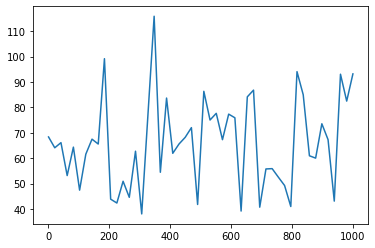

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 1000)
def f(x):
    return np.sin(x) + np.random.normal(scale=20, size=len(x)) + 70
plt.plot(x, f(x))

In [28]:
cycle = f(x)
cm = CarModel(array, cycle=cycle)
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 6)>
array([12130.745359, 11557.627829,  9717.541362,  9023.999065,  8340.143434,
        7671.46134 ])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
    value       int32 0
  * year        (year) int32 2018 2022 2035 2040 2045 2050

We can plot any attributes of the car models. For example here, the tank to wheel energy of all electric cars in 2018.

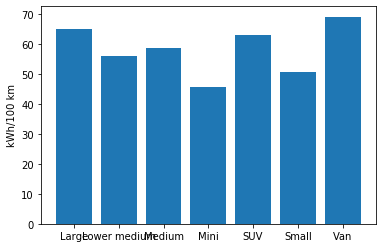

In [32]:
TtW_energy = cm.array.sel(powertrain='BEV', year=2018, parameter='TtW energy', value=0) * 1/3600 * 100
labels = cm.array.coords["size"].values.tolist()

plt.bar(labels, TtW_energy)
plt.ylabel('kWh/100 km')
plt.show()

The same can be done considering uncertainties in input parameters

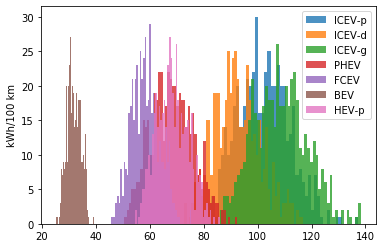

In [33]:
cip = CarInputParameters()
# 500 iterations
cip.stochastic(500)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='CADC')
cm.set_all()
TtW_energy = cm.array.sel(size='SUV', year=2017, parameter='TtW energy') * 1/3600 * 100

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.ylabel('kWh/100 km')
plt.legend()

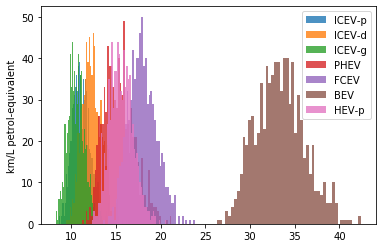

In [8]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(800)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC 3.4')
cm.set_all()
TtW_energy = 1 / (cm.array.sel(size='SUV', year=2017, parameter='TtW energy') / 42000) # assuming 42 MJ/L petrol

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.ylabel('km/L petrol-equivalent')
plt.legend()

We can check the randomly generated values for any parameter like so. Here, for the tank to wheel energy in kWh/100 km.

In [25]:
cm.array.sel(size='SUV', year=2017, parameter='TtW energy', value=0) * 1/3600 * 100

<xarray.DataArray (powertrain: 7)>
array([100.025052,  86.256925, 103.307561,  63.137503,  56.4196  ,  30.143269,
        64.698308])
Coordinates:
    size        <U12 'SUV'
  * powertrain  (powertrain) <U6 'ICEV-p' 'ICEV-d' 'ICEV-g' ... 'BEV' 'HEV-p'
    parameter   <U48 'TtW energy'
    year        int32 2017
    value       int32 0

We can look at noise emissions. We see that most noise is emitted in rura environment. Noise emissions are dependent of the driving cycle chosen.

Text(0, 0.5, 'joules per km')

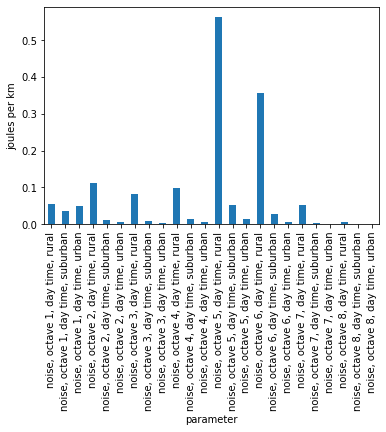

In [34]:
list_param = list(cm.array.parameter.values)
noise_emissions = [x for x in list_param if 'noise' in x]
data = cm.array.sel(parameter=noise_emissions, year=2017, size='Van', powertrain='ICEV-p', value=0)\
    .to_dataframe(name='noise emissions')['noise emissions']
data[data>0].plot(kind='bar')
plt.ylabel('joules per km')

Calculation of the inventories

In [35]:
ic = InventoryCalculation(cm.array)

We can have a look at the underlying technology matrix

In [36]:
ic.A

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0.

The labels of its rows and columns

In [37]:
ic.inputs

{('noise, octave 7, day time, urban',
  ('octave 7', 'day time', 'urban'),
  'joule'): 0,
 ('Particulates, > 2.5 um, and < 10um',
  ('air', 'non-urban air or from high stacks'),
  'kilogram'): 1,
 ('drawing of pipe, steel', 'RER', 'kilogram', 'drawing of pipe, steel'): 2,
 ('market for corrugated board box',
  'RoW',
  'kilogram',
  'corrugated board box'): 3,
 ('electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted',
  'DE',
  'kilowatt hour',
  'electricity, low voltage'): 4,
 ('market for tin', 'GLO', 'kilogram', 'tin'): 5,
 ('treatment of hazardous waste, hazardous waste incineration',
  'CH',
  'kilogram',
  'hazardous waste, for incineration'): 6,
 ('Electricity, high voltage, natural gas CCPP, at grid',
  'RER',
  'kilowatt hour',
  'Electricity, high voltage, natural gas CCPP, at grid'): 7,
 ('Bimetallic busbars and washers',
  'GLO',
  'kilogram',
  'Bimetallic busbars and washers'): 8,
 ('End plate', 'GLO', 'kilowatt', 'End plate'): 9,

For now, only the Recipe Midpoint methods are present. LCIA scores can be obtained this way:

In [38]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)
results = ic.calculate_impacts()

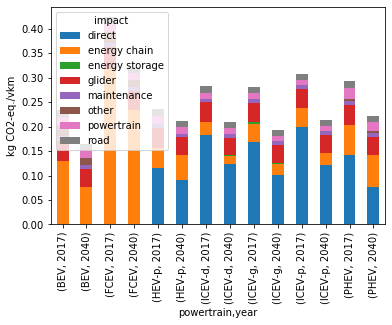

In [39]:
results.sel(impact_category='climate change', size='Large', value=0).to_dataframe('impact').unstack(level=2)['impact'].plot(kind='bar',
                stacked=True)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

We can specify a scope, to narrow the analysis down to specific vehicles. A scope dictionary needs to have the following format:

In [ ]:
scope = {
    "size":["Small"]
    "powertrain":["ICEV-d"]
    "year":[2017]
}

Not all the key:values need to be included. If a key is missing, not filter will apply.

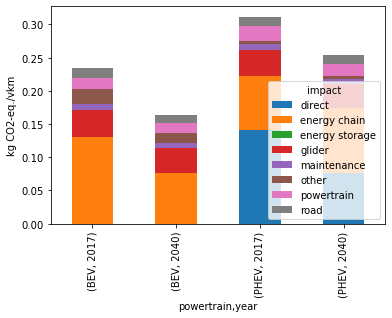

In [40]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}
ic = InventoryCalculation(cm.array, scope=scope)
results = ic.calculate_impacts()
results.sel(impact_category='climate change', size='Large', value=0).to_dataframe('impact').unstack(level=2)['impact'].plot(kind='bar',
                stacked=True)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

In [42]:
cip = CarInputParameters()
cip.stochastic(500)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
scope = {
    'powertrain':['BEV', 'PHEV'],
}
ic = InventoryCalculation(cm.array, scope=scope)

results = ic.calculate_impacts()

Text(0, 0.5, 'kg CO2-eq./vkm')

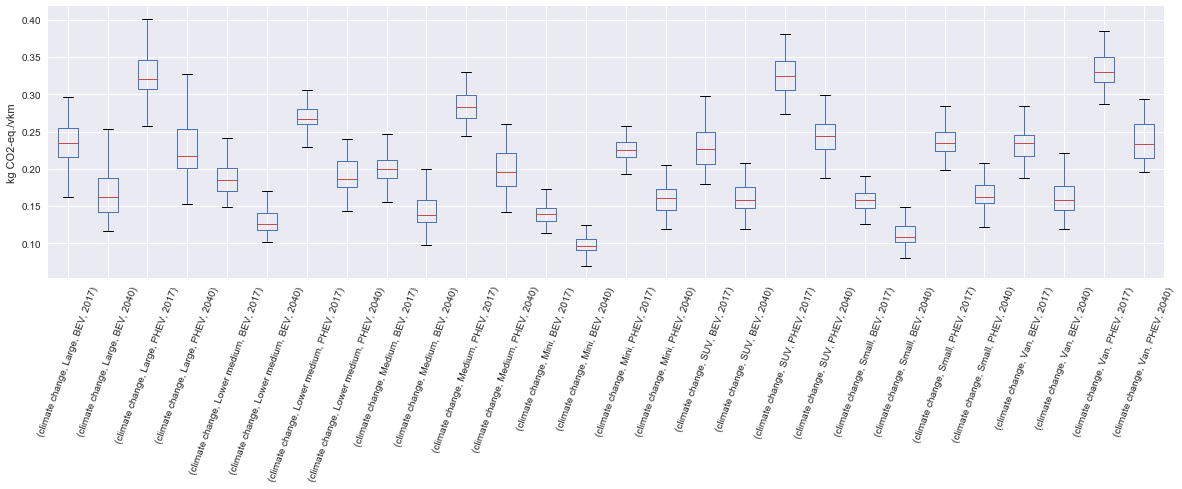

In [35]:
data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

We can specify background assumptions

For example, we wish to charge BEV batteries with German electricity

Text(0, 0.5, 'kg CO2-eq./vkm')

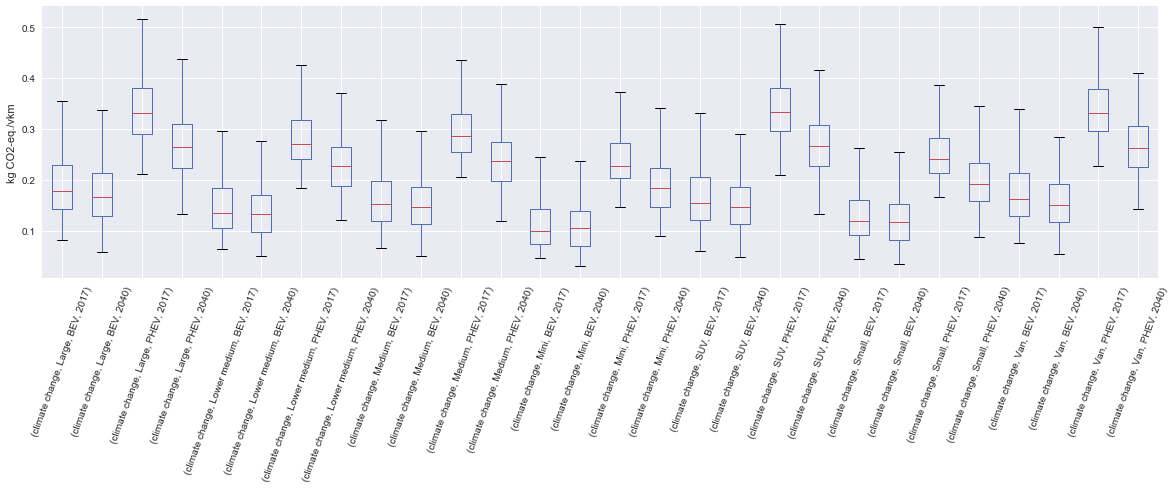

In [43]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}

background_configuration = {
   'background_country' : 'DE' 
}

ic = InventoryCalculation(cm.array, scope=scope, background_configuration = background_configuration)

results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

Or with a specific electricity mix in mind...

Text(0, 0.5, 'kg CO2-eq./vkm')

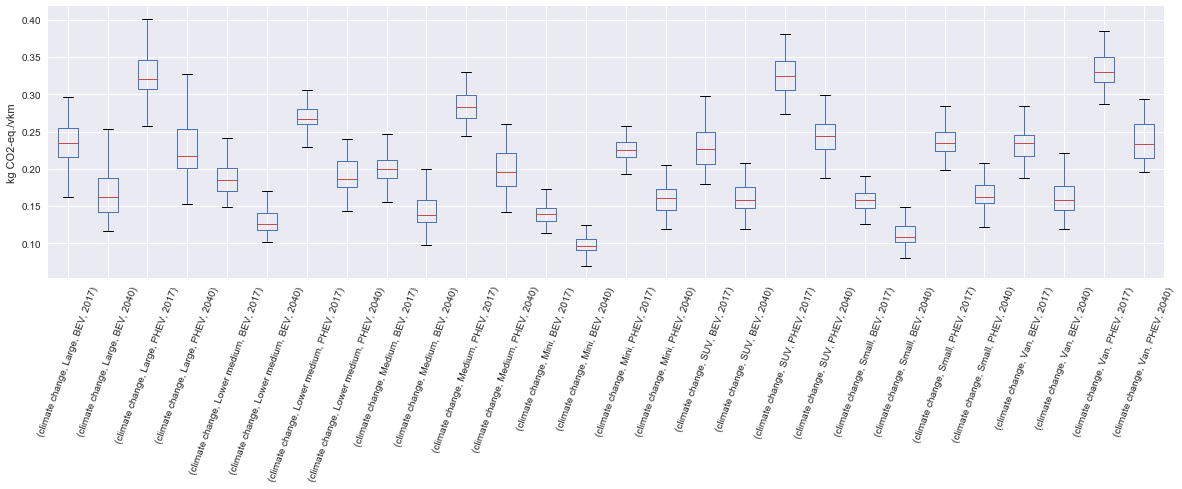

In [37]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}

"""
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste
"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses of Germany
    'custom electricity mix' : [[.5,.5,0,0,0,0,0,0,0,0],
                                [.5,.5,0,0,0,0,0,0,0,0]] # in this case, 50% hydro, 50% nuclear
}
ic = InventoryCalculation(cm.array, scope=scope, background_configuration = background_configuration)
results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

We can also change the fuel pathways for different fuels:
* diesel: conventional or biodiesel
* petrol: conventional or bio-ethanol
* gas: conventional or bio-methane
* hydrogen: electrolysis or steam methane reforming
* electricity: country mix or custom mix

As well as choose from a few technologies for energy storage:
* battery: LFP, NMC or NCA chemistries
* battery: country of manufacture
* hydrogen: PEM

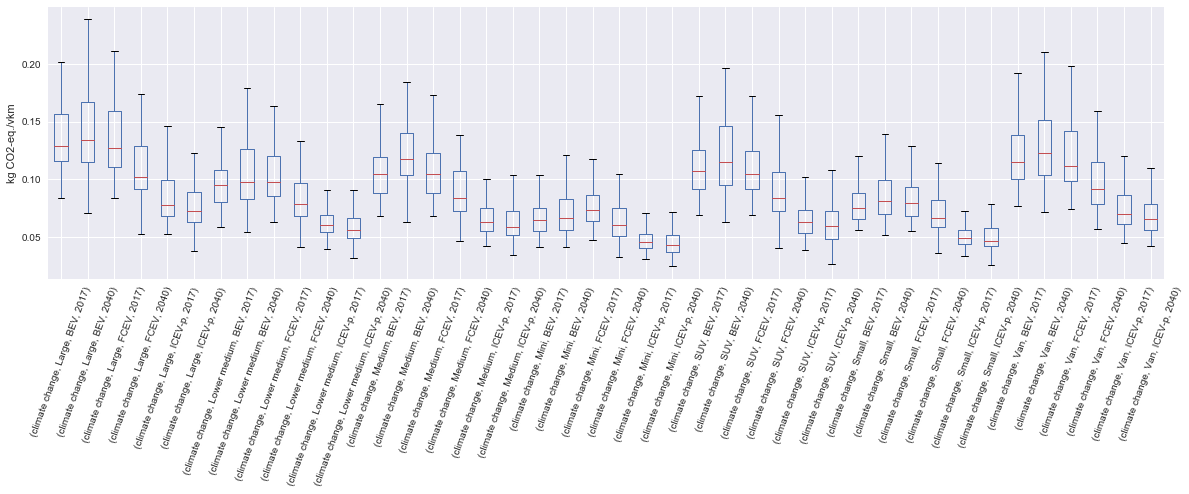

In [2]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(100)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)



"""
Electricity mixes
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste

Hydrogen technologies
Electrolysis
Electrolysis - solar
Electrolysis - hydro
Electrolysis - nuclear
SMR

Natural gas technologies
cng
biogas

Diesel technologies
diesel
biodiesel - algae
biodiesel - cooking oil

Petrol technologies
petrol
bioethanol - wheat straw
bioethanol - maize starch
bioethanol - sugarbeet
bioethanol - forest residues

"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses of Germany
    'custom electricity mix' : [[1,0,0,0,0,0,0,0,0,0], # in this case, 100% hydropower
                                [0.5,0.5,0,0,0,0,0,0,0,0]], # in this case, 50% hydro, 50% nuclear
    'hydrogen technology' : 'Electrolysis',
    'petrol technology': 'bioethanol - wheat straw',
    'battery technology': 'LFP',
    'battery origin': 'NO'
}
scope = {
    'powertrain':['BEV', 'FCEV', 'ICEV-p'],
}

ic = InventoryCalculation(cm.array, scope=scope, background_configuration = background_configuration)
results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

In [3]:
import bw2io

In [ ]:
bw2io.importers.base_lci

# Export inventories

Inventories in `static` calculation mode can be exported to different formats:
* as an Excel file compatible for import with `brightway2`
* a Brightway2 LCIImporter object
* a Python dictionary

## Export inventories without uncertainty 

Inventories are exported to an Excel file which can later be imported into `brightway2`. The `export_to_excel()` function returns the filepath where the Excel file can be found (the same directory as the script calling it).

In [1]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

scope = {
    'powertrain':['ICEV-d', 'PHEV'],
}

ic = InventoryCalculation(cm.array, scope=scope)

ic.export_lci_to_excel()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


Inventories exported to lci-test.xlsx.


'lci-test.xlsx'

Here, the inventory is instead returned as a `brightway2` LCIImporter object, which can be directly registered into `brightway2`.

In [2]:
i, _ = ic.export_lci_to_bw()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


In [5]:
import brightway2 as bw
bw.projects.set_current('import_36_for_carculator')

if "additional_biosphere" in bw.databases:
    del bw.databases['additional_biosphere']
if "carculator export" in bw.databases:
    del bw.databases['carculator export']
    i.apply_strategies()

i.match_database('ecoinvent 3.6 cutoff', fields=('name', 'unit', 'location', 'reference product'))
i.match_database("biosphere3", fields=('name', 'unit', 'categories'))
i.match_database(fields=('name', 'unit', 'location', 'reference product'))
i.match_database(fields=('name', 'unit', 'categories'))
i.create_new_biosphere("additional_biosphere", relink=True)
i.statistics()
#i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.01 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Creating new biosphere database: additional_biosphere
Applying strategy: link_iterable_by_fields
Applied 1 strategies in 0.05 seconds
264 datasets
7959 exchanges
0 unlinked exchanges
  


(264, 7959, 0)

Finally, the inventory can be exported as a Python dictionary

In [6]:
lci, _ = ic.export_lci()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


In [7]:
lci[0]

{'production amount': 1,
 'database': 'carculator export',
 'name': 'Electricity, high voltage, natural gas CCPP, at grid',
 'unit': 'kilowatt hour',
 'location': 'RER',
 'exchanges': [{'name': 'Electricity, high voltage, natural gas CCPP, at grid',
   'database': 'carculator export',
   'amount': 1.0,
   'unit': 'kilowatt hour',
   'type': 'production',
   'location': 'RER',
   'reference product': 'Electricity, high voltage, natural gas CCPP, at grid',
   'uncertainty type': 0},
  {'name': 'transmission network construction, long-distance',
   'database': 'carculator export',
   'amount': 3.17e-10,
   'unit': 'kilometer',
   'type': 'technosphere',
   'location': 'UCTE',
   'reference product': 'transmission network, long-distance',
   'uncertainty type': 0},
  {'name': 'Ozone',
   'database': 'biosphere3',
   'amount': 4.158e-06,
   'unit': 'kilogram',
   'type': 'biosphere',
   'categories': ('air',),
   'uncertainty type': 0},
  {'name': 'electricity production, natural gas, combi

# Export inventories with uncertainty

Additionally, if the model has been run in `stochastic` mode, the exported inventories will include that uncertainty. The uncertainty of a given exchange is expressed as an array of values to be reused for pre-sampling by `brightway2`.

Therefore, alongside the inventory, an array that stores the pre-sampled random values generated by CarModel for each uncertain exchange is returned. This array of pre-sampled values can then be passed to the Monte Carlo function of `brightway2` which will use these values instead of randomly generated ones. This has the advantage of preserving the relation between inputs and outputs of a same activity.


In [1]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
# 1000 iterations
cip.stochastic(1000)
_, array = fill_xarray_from_input_parameters(cip)
array = array.interp(year=[2028, 2042],  kwargs={'fill_value': 'extrapolate'})
cm = CarModel(array, cycle='NEDC')
cm.set_all() 

# Build the inventory for a large diesel car in 2028
ic = InventoryCalculation(cm.array, scope={"size":['Large'], "powertrain":['ICEV-d'], "year":[2028]})

# Receive the inventory as a brightway2 LCIImporter object, as well as the arrays that contain pre-sampled values
lci, arr = ic.export_lci_to_bw()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 594
Total time elapsed: 00:00:00


In [2]:
# Open a brightway2 project where ecoinvent 3.6 is installed
import brightway2 as bw
bw.projects.set_current('import_36_for_carculator')

In [3]:
# Import the inventory
import bw2io
i = lci
if "additional_biosphere" in bw.databases:
    del bw.databases['additional_biosphere']
if "carculator export" in bw.databases:
    del bw.databases['carculator export']
i.apply_strategies()

i.match_database('ecoinvent 3.6 cutoff', fields=('name', 'unit', 'location', 'reference product'))
i.match_database("biosphere3", fields=('name', 'unit', 'categories'))

i.match_database(fields=('name', 'unit', 'location', 'reference product'))
i.match_database(fields=('name', 'unit', 'categories'))
i.create_new_biosphere("additional_biosphere", relink=False)
i.match_database("additional_biosphere", fields=('name', 'unit', 'categories'))
i.statistics()
i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.00 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Creating new biosphere database: additional_biosphere
Applying strategy: link_iterable_by_fields
167 datasets
1402 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/16/2019 13:41:55
  Finished: 12/16/2019 13:41:55
  Total time elapsed: 00:00:00
  CPU %: 73.50
  Memory %: 41.36
Created database: carculator export


Brightway2 SQLiteBackend: carculator export

In [5]:
# Merge the newly imported invenotry with ecoinvent 3.6
import bw2data
bw2data.utils.merge_databases('ecoinvent 3.6 cutoff', 'carculator export')

In [6]:
# Reformat the pre-samples array with the correct activity codes
l_flows = []
for a in arr:
    l_flows.extend([a[1][0][0], a[1][0][1]])

l_flows = set(l_flows)
d_flows = {}


for ds in bw.Database('biosphere3'):
    if (ds['name'], tuple(ds['categories']), ds['unit']) in l_flows:
        d_flows[(ds['name'], tuple(ds['categories']), ds['unit'])] = (ds['database'], ds['code'])

for ds in bw.Database('carculator export'):
    if (ds['name'], ds['location'], ds['unit'], ds['reference product']) in l_flows:
        d_flows[(ds['name'], ds['location'], ds['unit'], ds['reference product'])] = (ds['database'], ds['code'])
        
for ds in bw.Database('ecoinvent 3.6 cutoff'):
    if (ds['name'], ds['location'], ds['unit'], ds['reference product']) in l_flows:
        d_flows[(ds['name'], ds['location'], ds['unit'], ds['reference product'])] = (ds['database'], ds['code'])


        
presamples_arr = []     
for a in range(0,len(arr)):
    if arr[a][1][0][0] in d_flows:
        presamples_arr.append(
            (arr[a][0].reshape((1,-1)),
                  [(d_flows[arr[a][1][0][0]],
                   d_flows[arr[a][1][0][1]],
                   arr[a][1][0][2])],
                  arr[a][2]))

In [8]:
# Build the pre-samples array
import presamples
pp_id, stochastic_filepath = presamples.create_presamples_package(presamples_arr, name='presamples_carculator')

In [10]:
# Build the functional unit
multi_FU = [{a:1} for a in bw.Database('ecoinvent 3.6 cutoff') if 'Passenger' in a['name']][:5]
multi_FU

[{'Passenger car, ICEV-d, Large, 2028' (kilometer, GLO, None): 1}]

In [12]:
# Run the Monte Carlo analysis with the pre-samples array
import numpy as np
iterations=500
results = np.zeros((iterations, len(multi_FU)))
mc = bw.MonteCarloLCA(multi_FU[0], ('IPCC 2013', 'climate change', 'GWP 100a'), presamples=[stochastic_filepath])

for i in range(iterations):
    print(i)
    next(mc)
    for j, fu in enumerate(multi_FU):
        mc.redo_lcia(fu)
        results[i, j] = mc.score

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

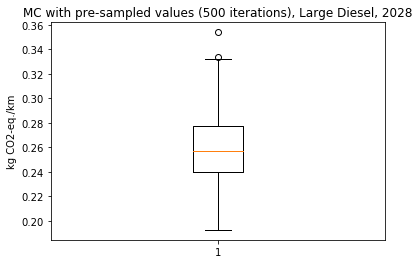

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(results)
plt.title('MC with pre-sampled values (500 iterations), Large Diesel, 2028')
plt.ylabel("kg CO2-eq./km")
plt.show()